## SatPy - Part 1: Exploring Advanced Himawari Imager (AHI) data

For detailed documentation, visit [SatPy Documentation](https://satpy.readthedocs.io/en/latest/index.html).

SatPy is a powerful library for **reading**, **manipulating**, and **displaying** data from remote sensors, primarily related to meteorology. It also provides the capability to **save** this data as images or in various formats.

SatPy excels at generating images with **individual channels or bands** and creating **RGB composites** directly from satellite instrument data.

The pyresample library is used for **resampling data** in different areas with specific projections or uniform grids.

Additionally, Satpy offers various **atmospheric corrections** and **visual enhancements**, either directly within Satpy or through the PySpectral and TrollImage packages.

# Advanced Himawari Imager (AHI) data
https://www.earthdata.nasa.gov/sensors/ahi

In [1]:
urls2dwn = ['https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B01_JP01_R10_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B02_JP01_R10_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B03_JP01_R05_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B04_JP01_R10_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B05_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B06_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B07_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B08_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B09_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B10_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B11_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B12_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B13_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B14_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B15_JP01_R20_S0101.DAT.bz2',
 'https://noaa-himawari9.s3.amazonaws.com/AHI-L1b-Japan/2024/03/02/1600/HS_H09_20240302_1600_B16_JP01_R20_S0101.DAT.bz2']

In [3]:
import requests
import os

# Specify the local directory where you want to save the files.
# local_directory = input("Enter the path to the download folder: ")
local_directory = "Output_data"
# Ensure that the local directory exists; create it if it doesn't.
os.makedirs(local_directory, exist_ok=True)

# Iterate through the URLs and download files.
for urld in urls2dwn:
    # Extract the filename from the URL.
    ntw = urld.split('/')[-1]
    
    # Construct the complete path to save the file in the local directory.
    file_path = os.path.join(local_directory, ntw)
    
    # Send an HTTP GET request to the URL.
    resp = requests.get(urld)
    
    # Check if the response is successful (status code 200).
    if resp.status_code == 200:
        # Write the content to the file in binary mode.
        with open(file_path, "wb") as file:
            file.write(resp.content)
        print(f"File '{ntw}' downloaded and saved to '{local_directory}'.")
    else:
        print(f"Failed to download '{ntw}' from the URL: {urld}")


File 'HS_H09_20240302_1600_B01_JP01_R10_S0101.DAT.bz2' downloaded and saved to 'Output_data'.
File 'HS_H09_20240302_1600_B02_JP01_R10_S0101.DAT.bz2' downloaded and saved to 'Output_data'.
File 'HS_H09_20240302_1600_B03_JP01_R05_S0101.DAT.bz2' downloaded and saved to 'Output_data'.
File 'HS_H09_20240302_1600_B04_JP01_R10_S0101.DAT.bz2' downloaded and saved to 'Output_data'.
File 'HS_H09_20240302_1600_B05_JP01_R20_S0101.DAT.bz2' downloaded and saved to 'Output_data'.
File 'HS_H09_20240302_1600_B06_JP01_R20_S0101.DAT.bz2' downloaded and saved to 'Output_data'.
File 'HS_H09_20240302_1600_B07_JP01_R20_S0101.DAT.bz2' downloaded and saved to 'Output_data'.
File 'HS_H09_20240302_1600_B08_JP01_R20_S0101.DAT.bz2' downloaded and saved to 'Output_data'.
File 'HS_H09_20240302_1600_B09_JP01_R20_S0101.DAT.bz2' downloaded and saved to 'Output_data'.
File 'HS_H09_20240302_1600_B10_JP01_R20_S0101.DAT.bz2' downloaded and saved to 'Output_data'.
File 'HS_H09_20240302_1600_B11_JP01_R20_S0101.DAT.bz2' downl

## Loading and Visualizing Satellite Data

# SatPy is well-suited for working with geostationary satellite data, such as GOES-R or MSG:

In [4]:
# Importing the warnings module and setting it to ignore all warnings.
# This is useful to prevent unnecessary warning messages from cluttering the notebook output.
import warnings
warnings.filterwarnings('ignore')

In [5]:
from satpy.scene import Scene
# Importing Scene from the satpy module. Scene is used to represent satellite data 
# and allows for operations like reading, resampling, compositing, and saving data.

from satpy import find_files_and_readers
# Importing find_files_and_readers from satpy. This function is used to automatically
# locate satellite data files and determine the appropriate reader based on the 
# metadata and contents of the files.

This line imports the debug_on function from the satpy.utils module, which is used to enable detailed debug logging in Satpy. This can be helpful for troubleshooting and understanding the internal workings of Satpy processes.

In [6]:
from satpy.utils import debug_on

## Searching for Native MSG Data

In [8]:
from datetime import datetime  # Importing datetime for date and time operations

In [9]:
fMSGn = find_files_and_readers(start_time = datetime(2024,3,2,16,0),  # Set start time for file search
                            #end_time = datetime(2019,7,22,12,59),   # Optional: Set end time for file search
                            base_dir = 'Output_data',  # Set the base directory for the search
                            reader = 'ahi_hsd')  # Specify the file reader
fMSGn  # Display the found files

{'ahi_hsd': ['Output_data\\HS_H09_20240302_1600_B01_JP01_R10_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B02_JP01_R10_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B03_JP01_R05_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B04_JP01_R10_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B05_JP01_R20_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B06_JP01_R20_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B07_JP01_R20_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B08_JP01_R20_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B09_JP01_R20_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B10_JP01_R20_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B11_JP01_R20_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B12_JP01_R20_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B13_JP01_R20_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B14_JP01_R20_S0101.DAT.bz2',
  'Output_data\\HS_H09_20240302_1600_B15_JP01_R20_S0101.DAT.bz2',

In [10]:
from glob import glob  # Import the glob module to find files using pattern matching

In [11]:
fnames = glob('Output_data/*.bz2')
# List all files matching the specified pattern in the directory, useful for handling multiple files

# scn = Scene(reader = 'seviri_l1b_native', filenames = fnames)  # Create a Scene object using the SEVIRI L1B native reader with the specified filenames

In [12]:
fnames = glob('/home/jhbravo/input/AHI/*.bz2')
# The above line uses the glob module to find all files in the specified directory 
# that match the given pattern (i.e., all files with a .nat extension from a specific date and time)

> **SatPy** always expects the original file names!

So, do not change them when saving the data on your local machine. Otherwise, SatPy will not be able to open the files.

In [13]:
# Creating a Scene object using the file information gathered by find_files_and_readers function
scn = Scene(fMSGn)

In [14]:
# Accessing the attributes of the Scene object to retrieve metadata and other information
scn.attrs

{}

In [15]:
# Creating a Scene object from the filenames specified in fMSGn
scn = Scene(filenames = fMSGn)

In [16]:
# Accessing the attributes of the Scene object to view metadata information
scn_attrs = scn.attrs

In [17]:
# Retrieve and print all available dataset names in the scene
dataset_names = scn.all_dataset_names()
print(dataset_names)

['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16']


The `scn.load(['IR_108'], upper_right_corner='NE')` line in ther code bellow is used for loading a specific dataset from a satellite scene in Satpy. Let's break down what each part does:

1. `scn`: This is your Satpy `Scene` object, which contains data from satellite files that you've previously loaded.

2. `.load()`: This method is used to load specific datasets from the satellite files into memory, making them ready for processing and analysis.

3. `['IR_108']`: This is a list containing the names of the datasets you want to load. In this case, you're loading the dataset named `IR_108`, which typically refers to infrared imagery at a wavelength of 10.8 micrometers. This wavelength is often used for cloud imaging, among other applications.

4. `upper_right_corner='NE'`: This parameter specifies how the data should be oriented when loaded. `NE` means that the upper right corner of the data should be in the northeast. This can be important for getting the geographical orientation correct, especially when dealing with global or hemispherical datasets.

After running this line, the `IR_108` dataset will be loaded into your scene and ready for further processing, such as visualization or analysis.

In [18]:
scn.load(['B13'], upper_right_corner='NE')

The scn.keys() method in Satpy is used to retrieve a list of all the dataset keys available in the currently loaded Scene object.

In [19]:
scn.keys()

[DataID(name='B13', wavelength=WavelengthRange(min=10.2, central=10.4, max=10.6, unit='µm'), resolution=2000, calibration=<calibration.brightness_temperature>, modifiers=())]

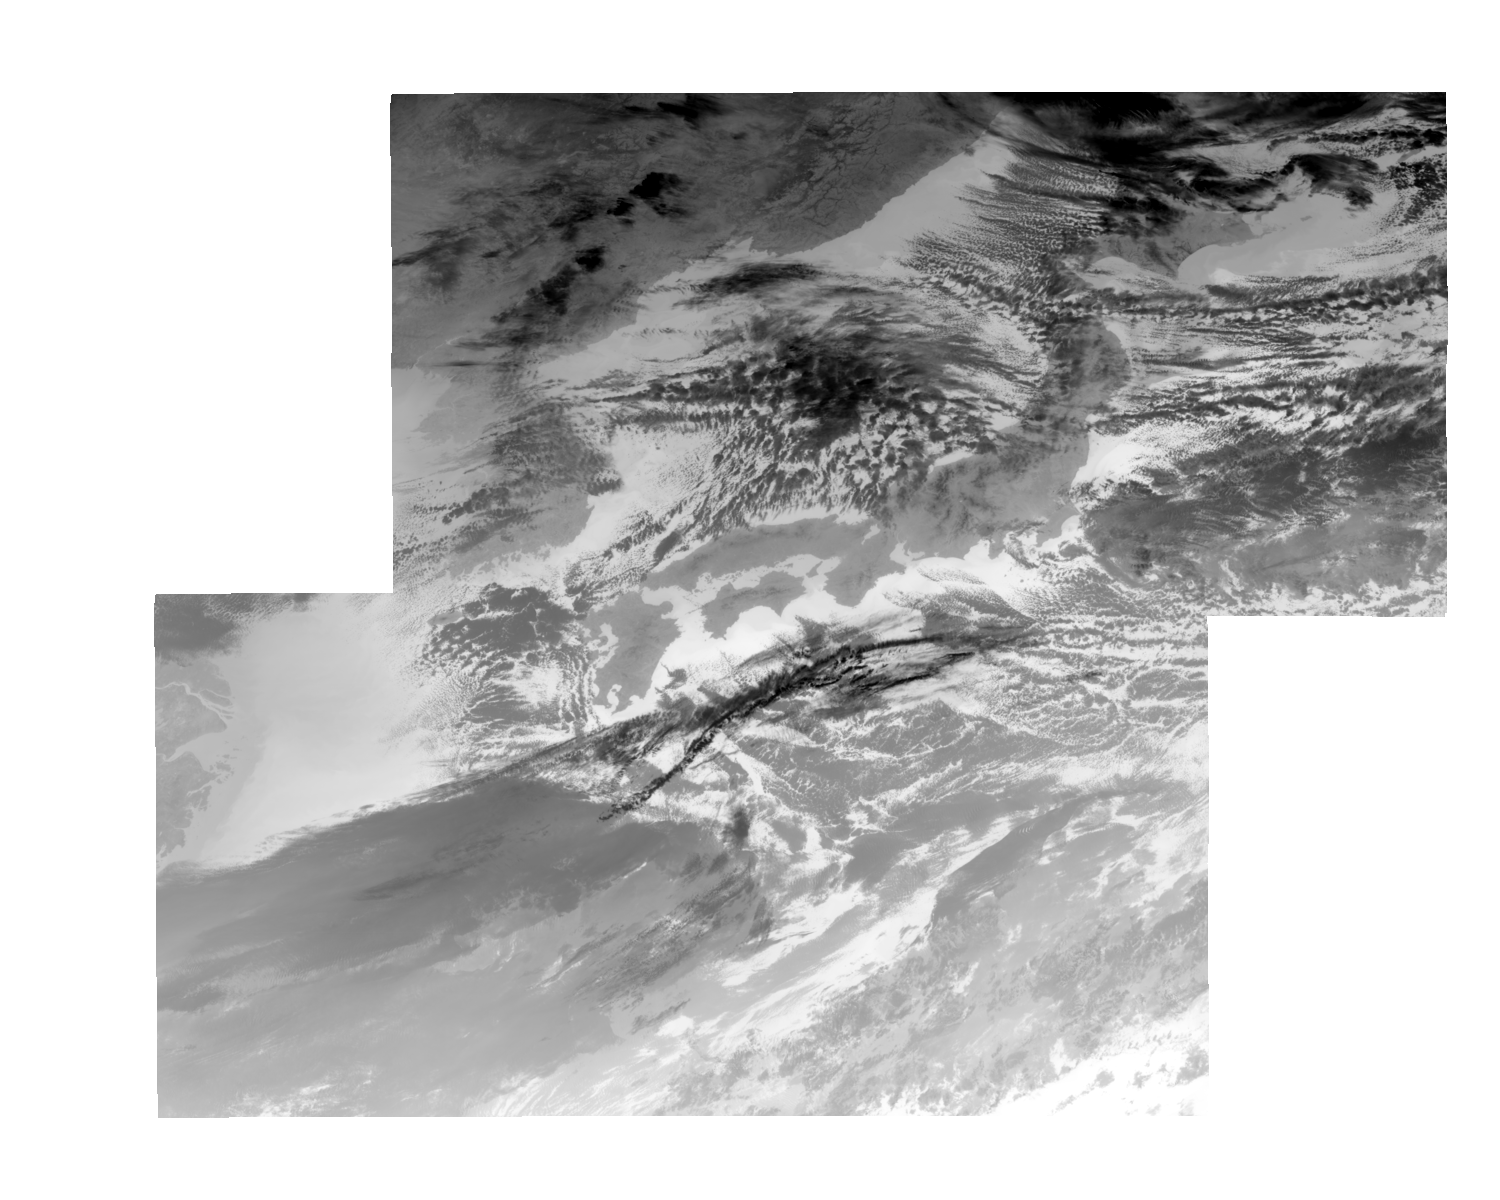

In [20]:
# Show the 'IR_108' dataset using Satpy's built-in visualization capabilities
scn.show('B13')

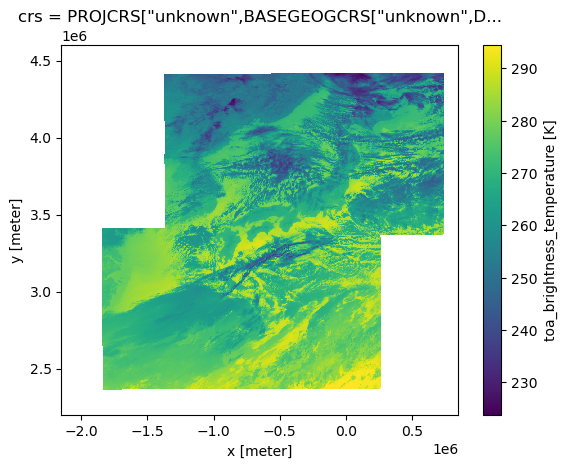

In [21]:
%matplotlib inline
# Plot the 'IR_108' channel using matplotlib's imshow function
scn['B13'].plot.imshow()

In [22]:
# Import the matplotlib library for creating visualizations in Python
import matplotlib.pyplot as plt

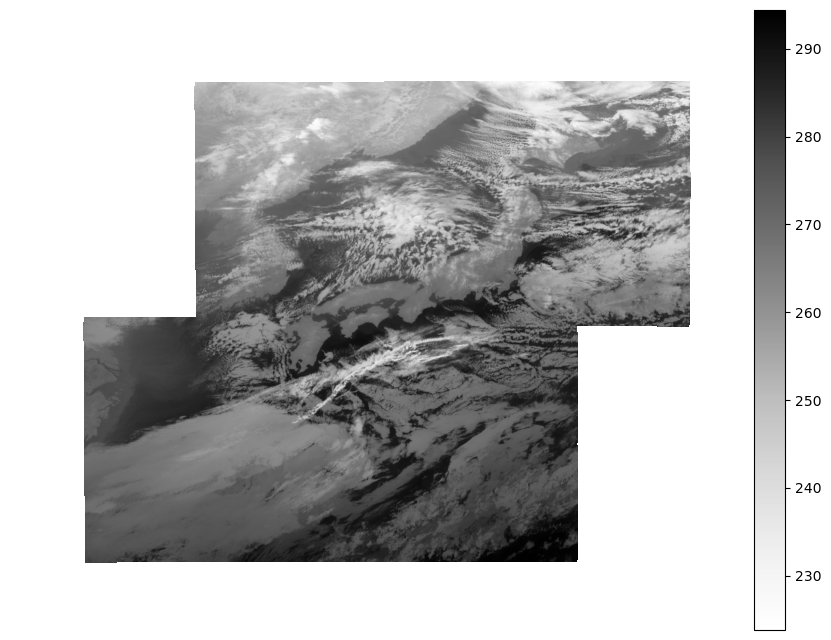

In [23]:
# Create a figure and an axes object with specified figure size
fig, ax = plt.subplots(figsize=(10,10))  

# Display the data from the 'IR_108' channel of the satellite scene using a grayscale color map
plt.imshow(scn['B13'].values, cmap="Greys")

# Hide the axis labels and ticks to focus on the image only
ax.set_axis_off()

# Add a colorbar to the plot with a fraction size of the plot, useful for scale/reference
plt.colorbar(fraction=.04)

# Display the figure with all its components
plt.show()

In [24]:
# Accessing the 'IR_108' dataset from the Scene object 'scn'
# - 'scn' is a Scene object, used for handling satellite data.
# - 'IR_108' specifies an infrared channel at 10.8 micrometers.
# This dataset is used for cloud imaging, surface temperature, and atmospheric analysis in meteorology.
scn['B13']

<xarray.DataArray 'clip-81aebbc686e47a4f4273921d6236193b' (y: 1200, x: 1500)>
dask.array<where, shape=(1200, 1500), dtype=float32, chunksize=(1200, 1500), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 4.599e+06 4.597e+06 4.595e+06 ... 2.203e+06 2.201e+06
  * x        (x) float64 -2.149e+06 -2.147e+06 -2.145e+06 ... 8.47e+05 8.49e+05
Attributes: (12/18)
    orbital_parameters:   {'projection_longitude': 140.7, 'projection_latitud...
    time_parameters:      {'nominal_start_time': datetime.datetime(2024, 3, 2...
    units:                K
    standard_name:        toa_brightness_temperature
    wavelength:           10.4 µm (10.2-10.6 µm)
    resolution:           2000
    ...                   ...
    reader:               ahi_hsd
    area:                 Area ID: JP01\nDescription: AHI JP01 area\nProjecti...
    calibration:          brightness_temperature
    modifiers:            ()
    _satpy_id:            DataID(name='B13', wavelength=WavelengthRange(min=1...
    ancillary_variables:  []

# Radiance Calibration

In [25]:
# Load the data for the 10.8μm band.
# The parameter [10.8] specifies the wavelength of the band in micrometers.
scn.load([10.3], 

         # Specify the calibration to radiance values.
         # "radiance" calibration converts the data to radiometric units (mW m-2 sr-1 (cm-1)-1).
         calibration=["radiance"], 

         # Set the orientation of the image.
         # "upper_right_corner='NE'" aligns the image with its upper right corner to the northeast.
         upper_right_corner='NE')

# Brightness Temperature Calibration

In [26]:
# Load the data for the 10.8μm band again, this time for a different calibration.
scn.load([10.3], 

         # Specify the calibration to brightness temperatures.
         # "brightness_temperature" calibration converts the data to temperature units (Kelvin).
         calibration=["brightness_temperature"], 

         # Maintain the same orientation as before.
         upper_right_corner='NE')

In [27]:
# List all the datasets currently loaded into the Scene object 'scn'
available_datasets = scn.keys()
print(available_datasets)

[DataID(name='B13', wavelength=WavelengthRange(min=10.2, central=10.4, max=10.6, unit='µm'), resolution=2000, calibration=<calibration.brightness_temperature>, modifiers=()), DataID(name='B13', wavelength=WavelengthRange(min=10.2, central=10.4, max=10.6, unit='µm'), resolution=2000, calibration=<calibration.radiance>, modifiers=())]


In [28]:
# Convert the keys view to a list to enable indexing
keys_list = list(scn.keys())

# Access the second dataset key
second_dataset_key = keys_list[1]

# Extract the central wavelength from the 'wavelength' attribute of the second dataset key
central_wavelength = second_dataset_key['wavelength'][1]

# Print the central wavelength and the key for the second dataset
print("Central Wavelength:", central_wavelength, "µm")
print("Second Dataset Key:", second_dataset_key)

Central Wavelength: 10.4 µm
Second Dataset Key: DataID(name='B13', wavelength=WavelengthRange(min=10.2, central=10.4, max=10.6, unit='µm'), resolution=2000, calibration=<calibration.radiance>, modifiers=())


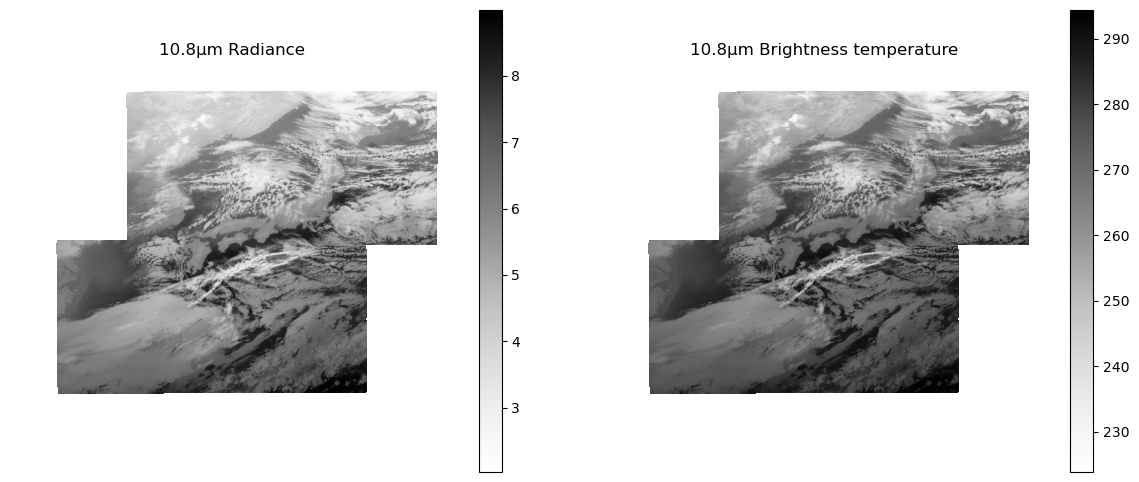

In [29]:
# Create a figure and two subplot axes, arranged horizontally, with specified size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Display the values of the second dataset in the Scene on the first subplot (ax1) using a grayscale color map
im1 = ax1.imshow(scn[scn.keys()[1]].values, cmap="Greys")
# Remove the axis labels and ticks for ax1
ax1.set_axis_off()

# Display the values of the first dataset in the Scene on the second subplot (ax2) using a grayscale color map
im2 = ax2.imshow(scn[scn.keys()[0]].values, cmap="Greys")
# Remove the axis labels and ticks for ax2
ax2.set_axis_off()

# Set the title for ax2
ax2.set_title("10.8μm Brightness temperature")
# Set the title for ax1
ax1.set_title("10.8μm Radiance")

# Add a colorbar next to ax1, adjusting its size
fig.colorbar(im1, ax=ax1, fraction=.05)
# Add a colorbar next to ax2, adjusting its size
fig.colorbar(im2, ax=ax2, fraction=.05)

# Display the figure
plt.show()

In [31]:
# Access the x-coordinates (longitude values) of the 'IR_108' data array in the Scene object
scn['B13'].x

<xarray.DataArray 'x' (x: 1500)>
array([-2148999.961386, -2146999.961422, -2144999.961458, ...,   844999.984817,
         846999.984781,   848999.984745])
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * x        (x) float64 -2.149e+06 -2.147e+06 -2.145e+06 ... 8.47e+05 8.49e+05
Attributes:
    units:    meter

In [32]:
# define palette (matplotlib style)
cmap = ['#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#b6ffb6', '#79ff79', '#00ff00', '#ff8e8e', '#ff5151', '#ff0000', '#aa0000', '#550000', '#00ffff', '#00bef3', '#0079ca', 
        '#0028a2', '#000079', '#fbfb00', '#e7e700', '#d2d200', '#baba00', '#a6a600', '#8e8e00', '#797900', '#656500', '#dbdbdb', '#d2d2d2', '#cacaca', '#c2c2c2', '#bababa', '#b2b2b2', 
        '#aaaaaa', '#a6a6a6', '#9e9e9e', '#969696', '#8e8e8e', '#868686', '#7d7d7d', '#757575', '#6d6d6d', '#656565', '#5d5d5d', '#595959', '#515151', '#494949', '#414141', '#393939',
        '#313131', '#282828', '#202020', '#181818', '#141414', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000', '#000000',]

In [33]:
# Retrieve the area definition (spatial reference) associated with the 'IR_108' data array from its attributes
area_def = scn['B13'].attrs['area']

In [34]:
# Convert the area definition to a Cartopy Coordinate Reference System (CRS) object for mapping and visualization
cartopy_crs = area_def.to_cartopy_crs()

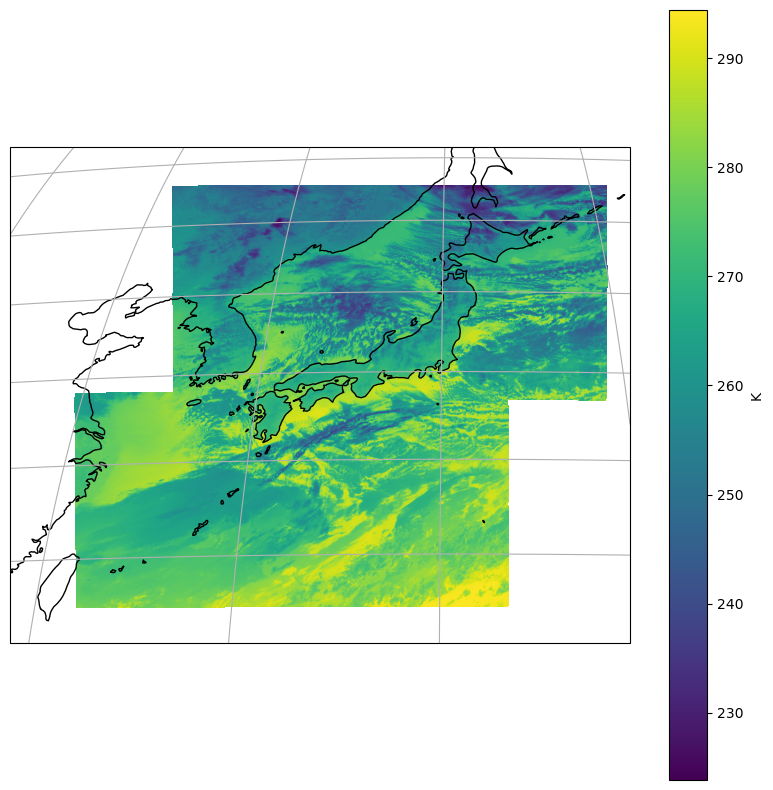

In [35]:
# Convert the area definition to a Cartopy CRS (Coordinate Reference System) object for accurate mapping
crs = area_def.to_cartopy_crs()

# Create a figure with specific size
fig = plt.figure(figsize=(10,10))

# Add axes to the figure with the specified projection (crs)
ax = plt.axes(projection=crs)

# Draw coastlines on the map for reference
ax.coastlines()

# Add gridlines to the map
ax.gridlines()

# Display the 'IR_108' data as an image, using the converted Cartopy CRS for correct geographical placement
plt.imshow(scn['B13'], transform=crs, extent=crs.bounds, origin='upper')

# Add a color bar to the plot, labeling it with the data's unit of measurement
plt.colorbar(label=scn['B13'].attrs['units'])

# Display the plot
plt.show()

In [36]:
# Import the NumPy library, which provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays
import numpy as np

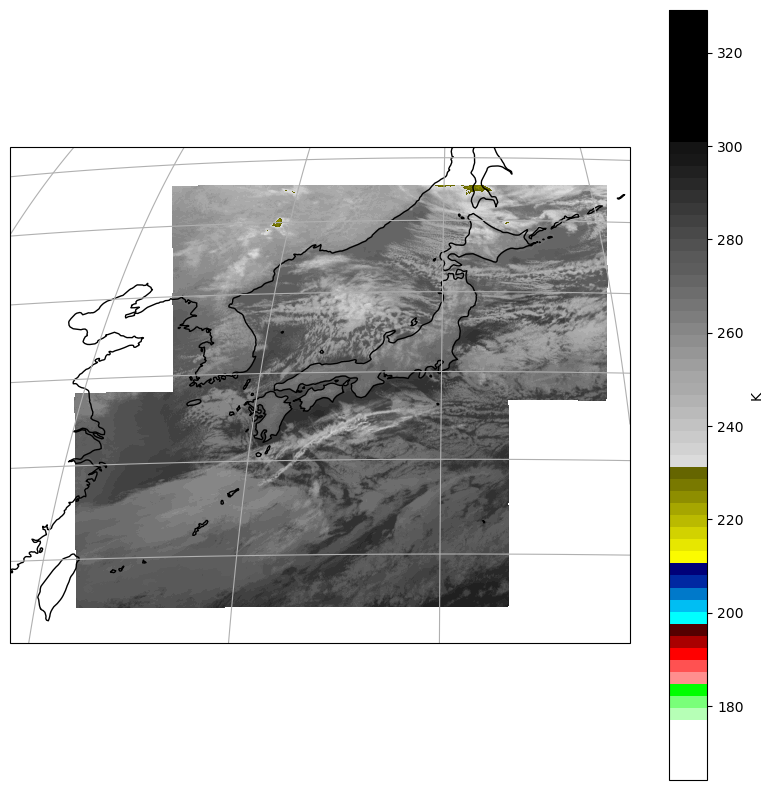

In [37]:
# Create an array of levels for the color map, spanning from -109 to 56, with the same length as the 'cmap'
levels = np.linspace(-109, 56, num=len(cmap))

# Create a BoundaryNorm object for the color map to ensure proper coloring based on specified levels
norm = plt.cm.colors.BoundaryNorm(levels, len(levels))

# Create a ListedColormap using the 'cmap' colors and the custom norm
irmap = plt.cm.colors.ListedColormap(cmap)

# Display results

# Convert the area definition to a Cartopy CRS (Coordinate Reference System) object for accurate mapping
crs = area_def.to_cartopy_crs()

# Create a figure with specific size
fig = plt.figure(figsize=(10,10))

# Add axes to the figure with the specified projection (crs)
ax = plt.axes(projection=crs)

# Draw coastlines on the map for reference
ax.coastlines()

# Add gridlines to the map
ax.gridlines()

# Display the 'IR_108' data as an image, using the converted Cartopy CRS for correct geographical placement
# Set the minimum and maximum values for the color map (vmin and vmax)
# Use the custom 'irmap' color map and apply the 'norm' for color scaling
plt.imshow(scn['B13'], transform=crs, extent=crs.bounds, origin='upper', vmin=-109 + 273.15, vmax=56 + 273.15, cmap=irmap)

# Add a color bar to the plot, labeling it with the data's unit of measurement
plt.colorbar(label=scn['B13'].attrs['units'])

# Display the plot
plt.show()